# USA HOUSE PRICE PREDICTION

The dataset is related with information about the price of a houses in USA.We have to predict the price of house

The dataset is from Kaggle . USA_House.csv consist of 5000 rows and 7 colums including the target variables

'Avg. Area Income' : Avg. Income of residents of the city house is located in.
'Avg. Area House Age' : Avg Age of Houses in same city
'Avg. Area Number of Rooms' : Avg Number of Rooms for Houses in same city 
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city 
'Area Population' : Population of city hou se is located in
'Price' : Price that the house sold at
'Address' : Address for the house

In [1]:
#MODULES & LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#Linear regression model
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import r2_score
#Lasso regression model
from sklearn.linear_model import Lasso
#Ridge regression model
from sklearn.linear_model import Ridge
#Decision tree model
from sklearn.tree import DecisionTreeRegressor
#Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
#Ada boost
from sklearn.ensemble import AdaBoostRegressor


In [2]:
#IMPORT DATASET
house_price=pd.read_csv('USA_Housing (address).csv')
house=house_price.copy()
house

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


# EDA

In [3]:
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
house.shape

(5000, 7)

In [7]:
house.duplicated().values.any()

False

In [8]:
house.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
le=LabelEncoder()
house["Address"]=le.fit_transform(house["Address"])

In [10]:
house

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,962
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,863
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,4069
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,4794
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,4736
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,4750
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,4636
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,1897
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,4833


In [11]:
cor_mat=house.corr()
cor_mat
cor_mat['Price'].sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Address                         0.008710
Name: Price, dtype: float64

# DATA PREPROCESSING

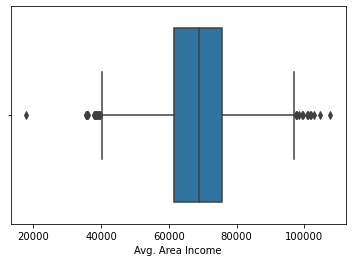

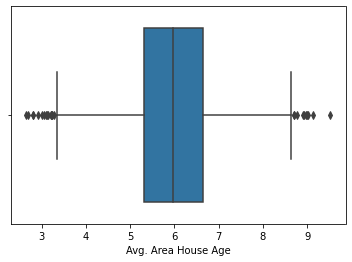

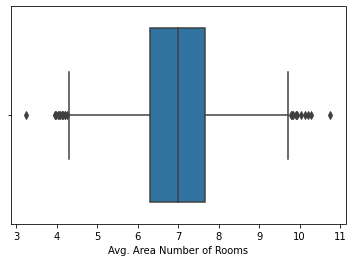

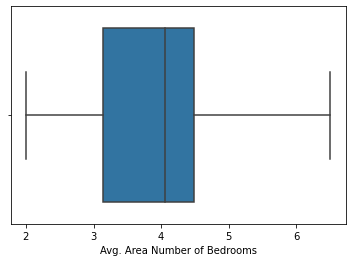

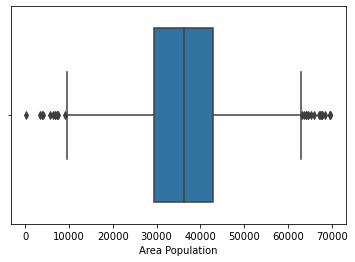

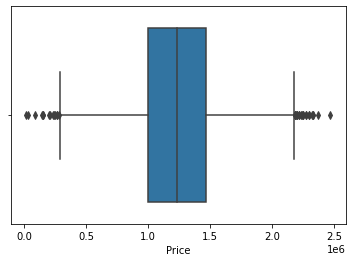

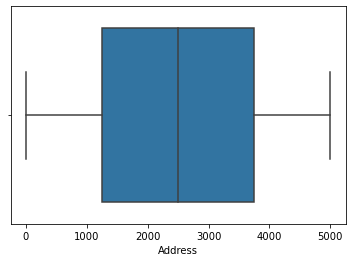

In [12]:
for i in house:
    sns.boxplot(x=house[i])
    plt.show()

In [13]:
IQR1=stats.iqr(house['Avg. Area Income'] ,interpolation="midpoint")
IQR1

14304.422619999998

In [14]:
Q1=house['Avg. Area Income'].quantile(0.25)
Q3=house['Avg. Area Income'].quantile(.75)
min_limit=Q1-1.5*IQR1
max_limit=Q3+1.5*IQR1
min_limit,max_limit

(40023.92846, 97239.97259499998)

In [15]:
house.loc[house['Avg. Area Income']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
558,99629.01358,5.431863,7.351398,5.45,36950.73906,1883481.075,4494
693,107701.74840,7.143522,8.518608,3.29,37619.43993,2332110.740,1844
962,101928.85810,4.829586,9.039382,4.08,22804.99194,1938866.490,3824
1096,97548.31041,5.460973,6.609396,2.50,39089.41571,2026303.098,1571
1734,104702.72430,5.575523,6.932106,3.22,22560.52713,1742431.663,666
1891,101144.32390,6.350845,7.231771,3.09,35772.52401,2007556.286,1073
2300,98468.25364,7.035383,6.629233,3.05,50676.31240,2275455.306,4764
2719,101599.67060,7.798746,7.480512,6.39,37523.86467,2370231.320,2366
3483,97881.58728,5.034395,7.575905,5.46,37152.79934,1859160.625,49
3541,102881.12090,6.471249,5.693536,3.12,21051.53129,1754937.715,3488


In [16]:
house.loc[house['Avg. Area Income']>max_limit,'Avg. Area Income']=max_limit
house.loc[house['Avg. Area Income']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [17]:
house.loc[house['Avg. Area Income']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
12,39033.80924,7.671755,7.250029,3.10,39220.36147,1.042814e+06,969
39,17796.63119,4.949557,6.713905,2.50,47162.18364,3.023558e+05,4451
411,36100.44423,5.778489,5.497450,2.29,44901.85734,5.995040e+05,3752
844,39411.65279,4.385845,7.047435,4.44,45851.39830,5.394834e+05,523
1271,37971.20757,4.291224,5.807510,3.24,33267.76773,3.114052e+04,4401
1459,35963.33081,3.438547,8.264122,3.28,24435.77730,1.430274e+05,775
1597,39294.03652,5.928585,5.960676,4.36,43183.51610,7.811375e+05,3693
2025,38139.91904,5.577267,6.348068,2.13,45899.73840,7.237501e+05,1331
2092,35608.98624,6.935839,7.827589,6.35,20833.00762,4.493316e+05,2920
2242,38868.25031,6.965104,8.966906,4.22,25432.07677,7.590447e+05,3884


In [18]:
house.loc[house['Avg. Area Income']<min_limit,'Avg. Area Income']=min_limit
house.loc[house['Avg. Area Income']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [19]:
IQR2=stats.iqr(house['Avg. Area House Age'],interpolation="midpoint")
IQR2

1.3285916020000004

In [20]:
Q1=house['Avg. Area House Age'].quantile(0.25)
Q3=house['Avg. Area House Age'].quantile(.75)
min_limit=Q1-1.5*IQR2
max_limit=Q3+1.5*IQR2
min_limit,max_limit

(3.3293956127499995, 8.64369588225)

In [21]:
house.loc[house['Avg. Area House Age']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
918,68615.76709,8.764786,6.122465,2.47,51791.80812,1836978.483,2035
1091,75358.48260,8.991399,7.282680,3.20,21319.99430,1740404.967,3787
1777,61025.39026,8.973441,7.905595,6.30,34730.76680,1468267.230,249
1855,68334.78256,8.688434,8.296462,4.23,36621.75954,1817829.530,4200
2898,57293.42740,9.125283,7.780008,4.30,27991.84000,1561313.838,3811
3138,77352.63760,9.008900,5.894762,3.49,39667.50726,1898168.684,4333
3388,70841.99649,8.702960,6.315200,3.20,37145.63263,1621742.748,3438
3989,65274.13995,9.519088,6.203729,2.05,25620.91569,1399906.450,4309
4859,73685.40366,8.916093,6.291818,3.05,36000.50603,1798927.098,3184
4978,80393.33950,8.899713,5.652974,4.04,39547.93249,1910585.052,91


In [22]:
house.loc[house['Avg. Area House Age']>max_limit,'Avg. Area House Age']=max_limit
house.loc[house['Avg. Area House Age']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [23]:
house.loc[house['Avg. Area House Age']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
847,67474.27980,3.278228,7.938421,4.12,34971.53955,1.013443e+06,2992
1074,65016.22381,2.644304,8.306304,6.05,15902.58202,4.145712e+05,2653
1285,71152.75617,3.055370,7.487300,3.30,40951.23930,1.002840e+06,1436
1494,57925.04470,3.214868,6.988818,2.33,43867.84454,6.338759e+05,651
1628,71721.42138,2.683043,7.583527,6.26,10704.82191,3.954402e+05,4123
1726,81535.14988,3.205828,6.222769,3.21,50999.85133,1.166750e+06,2742
1859,72139.64600,3.105751,6.070059,3.07,52601.11684,9.458332e+05,2317
2366,78578.34342,3.241716,8.100932,4.19,35399.90748,1.248742e+06,3203
2432,56402.54281,3.144894,8.075309,5.23,29689.69581,6.964672e+05,4351
2465,61544.58347,2.922736,7.791620,3.01,30699.38605,6.777723e+05,3061


In [24]:
house.loc[house['Avg. Area House Age']<min_limit,'Avg. Area House Age']=min_limit
house.loc[house['Avg. Area House Age']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [25]:
IQR3=stats.iqr(house['Avg. Area Number of Rooms'],interpolation="midpoint")
IQR3

1.3669442815000004

In [26]:
Q1=house['Avg. Area Number of Rooms'].quantile(0.25)
Q3=house['Avg. Area Number of Rooms'].quantile(.75)
min_limit=Q1-1.5*IQR3
max_limit=Q3+1.5*IQR3
min_limit,max_limit

(4.2488336777499995, 9.71628787)

In [27]:
house.loc[house['Avg. Area Number of Rooms']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1531,62381.92329,6.777764,9.794898,6.19,31391.26847,1.433542e+06,212
1536,69505.11151,7.352350,10.759588,5.14,48112.20017,2.235295e+06,351
2066,79057.79892,7.634776,10.219902,3.43,27142.02820,2.050594e+06,1553
2503,69012.76984,6.981767,9.841095,5.09,33069.76158,1.492787e+06,3928
2676,63151.16340,8.381096,9.921520,5.04,42266.29337,1.896650e+06,2063
3039,60285.60617,5.142415,9.916528,3.14,27370.18572,1.273554e+06,2441
3336,73211.13624,6.501139,10.280022,6.23,44198.33581,2.065710e+06,4978
3466,71833.17821,5.002945,9.926147,6.26,31750.22452,1.399813e+06,1521
3806,53230.11971,6.274360,10.024375,3.06,27360.81222,1.311432e+06,3182
3855,68449.04732,8.390376,10.144988,3.14,20145.88651,1.810158e+06,2079


In [28]:
house.loc[house['Avg. Area Number of Rooms']>max_limit,'Avg. Area Number of Rooms']=max_limit
house.loc[house['Avg. Area Number of Rooms']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [29]:
house.loc[house['Avg. Area Number of Rooms']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
28,90499.05745,6.384359,4.242191,3.04,33970.16499,1.240764e+06,2929
496,74277.71990,6.987280,3.236194,3.42,50233.79031,1.365081e+06,4399
1110,80284.99543,5.029475,4.049321,2.20,23457.12640,6.379519e+05,4231
1423,56103.91700,4.725541,4.129733,3.40,41330.60856,5.937662e+05,3227
1757,52868.32302,5.823226,3.969632,4.38,41849.05508,6.237216e+05,1656
1799,60167.67261,4.590613,3.950973,4.06,16811.30329,8.859177e+04,4337
2771,66961.66442,7.412989,3.950225,2.31,33423.29329,1.128720e+06,2051
2963,59141.79644,5.631317,4.198677,2.17,29386.58045,3.136515e+05,2367
3600,67977.38496,6.978763,4.087718,4.26,24246.02806,8.238644e+05,1109
3803,65718.30197,4.907385,4.147431,4.14,54798.51145,9.957216e+05,1841


In [30]:
house.loc[house['Avg. Area Number of Rooms']<min_limit,'Avg. Area Number of Rooms']=min_limit
house.loc[house['Avg. Area Number of Rooms']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [31]:
IQR4=stats.iqr(house['Area Population'],interpolation="midpoint")
IQR4

13461.42076

In [32]:
Q1=house['Area Population'].quantile(0.25)
Q3=house['Area Population'].quantile(.75)
min_limit=Q1-1.5*IQR4
max_limit=Q3+1.5*IQR4
min_limit,max_limit

(9211.797559999999, 63053.421910000005)

In [33]:
house.loc[house['Area Population']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
228,66574.70999,5.550265,6.844150,2.17,69575.44946,1702406.039,2503
353,72445.03330,5.488197,6.509449,2.48,69553.98833,1726719.067,1284
1234,63785.55128,7.196314,6.357874,4.50,67353.96520,1747244.863,4776
1361,55621.89910,3.735942,6.868291,2.30,63184.61315,1102641.114,3127
1595,64350.28457,6.761203,7.128710,3.03,69592.04024,1772390.553,2180
1965,63884.92641,7.722146,5.791958,4.33,64566.68738,1667560.879,1893
2108,59391.05678,6.492409,8.784536,6.32,64543.32245,1599416.014,159
2173,50143.64485,4.230051,7.979250,4.04,67601.22356,1168588.031,3535
2380,56073.89244,6.576733,6.959056,4.40,64149.68021,1409762.119,4287
2422,54236.69625,5.643911,8.473199,3.27,65857.93332,1372969.311,954


In [34]:
house.loc[house['Area Population']<min_limit,'Area Population']=min_limit
house.loc[house['Area Population']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [35]:
IQR5=stats.iqr(house['Price'],interpolation="midpoint")
IQR5

473853.39764999994

In [36]:
Q1=house['Price'].quantile(0.25)
Q3=house['Price'].quantile(.75)
min_limit=Q1-1.5*IQR5
max_limit=Q3+1.5*IQR5
min_limit,max_limit

(286797.0386000001, 2181990.300975)

In [37]:
house.loc[house['Price']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
256,91159.418330,6.536045,7.373851,3.01,54861.09110,2298379.487,795
355,87266.340230,8.248959,7.234261,5.00,45161.18768,2249122.541,183
465,90592.469610,7.700132,9.708803,5.19,37223.87617,2469065.594,4745
622,90890.485810,7.510171,7.595487,6.21,45519.25627,2252243.340,261
693,97239.972595,7.143522,8.518608,3.29,37619.43993,2332110.740,1844
715,92280.497470,7.258627,8.222633,4.31,38004.14521,2237778.026,4028
901,89089.432070,7.146246,9.179994,5.29,49782.15207,2271112.744,3678
924,83814.101160,8.571797,7.392164,3.39,51538.05680,2330289.701,609
990,82915.911430,7.078994,7.882701,5.20,50445.64737,2185480.091,1740
1208,83936.341970,7.704505,6.193618,3.19,55471.78338,2198564.573,103


In [38]:
house.loc[house['Price']>max_limit,'Price']=max_limit
house.loc[house['Price']>max_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [39]:
house.loc[house['Price']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
90,48904.98327,4.844973,5.448956,3.38,32960.75307,201898.08660,981
263,40366.61629,4.902940,7.617118,5.07,16349.36539,152071.87470,2268
696,49851.13478,4.684996,5.259695,3.04,32511.84627,283208.13220,198
1271,40023.92846,4.291224,5.807510,3.24,33267.76773,31140.51762,4401
1356,56654.96239,5.187860,5.336778,3.31,25801.96593,239319.93420,1661
1459,40023.92846,3.438547,8.264122,3.28,24435.77730,143027.36450,775
1578,50926.77663,4.507953,6.154788,4.01,33663.66924,211017.97050,3133
1661,48735.92451,5.543730,6.091906,2.43,19682.34729,151527.08260,1533
1799,60167.67261,4.590613,4.248834,4.06,16811.30329,88591.77016,4337
2756,62173.58010,5.098959,5.662268,3.14,9211.79756,231189.82100,3169


In [40]:
house.loc[house['Price']<min_limit,'Price']=min_limit
house.loc[house['Price']<min_limit]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


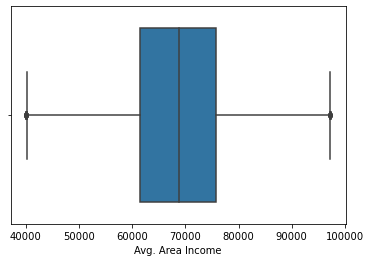

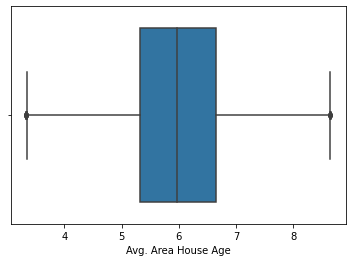

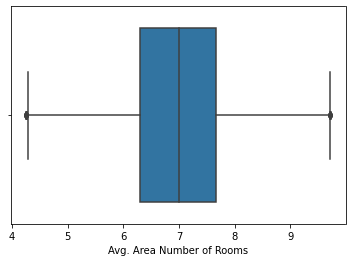

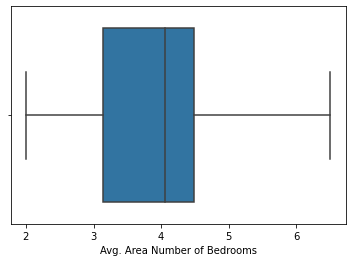

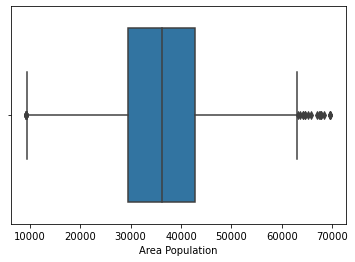

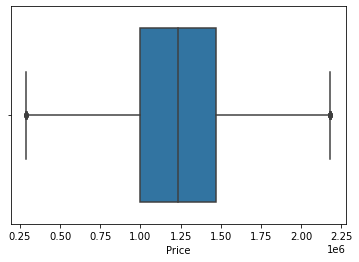

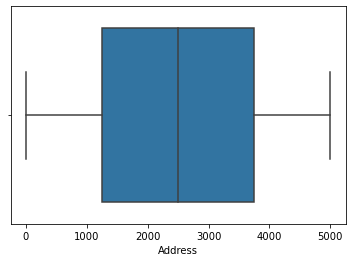

In [41]:
for i in house:
    sns.boxplot(x=house[i])
    plt.show()

# VISUALIZATION

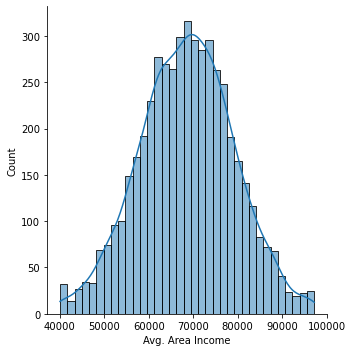

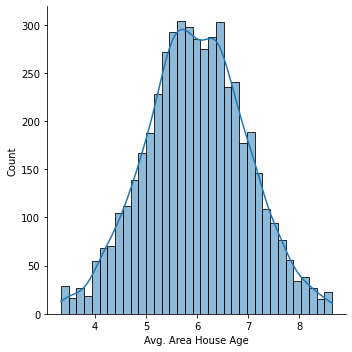

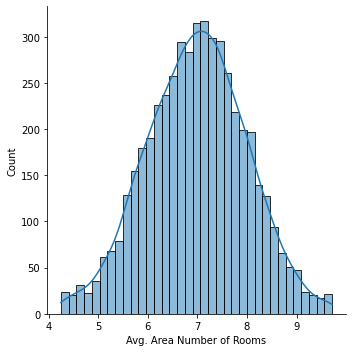

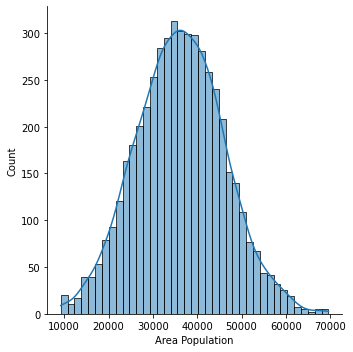

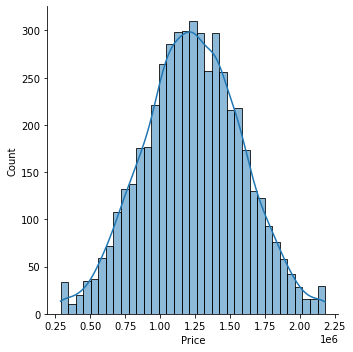

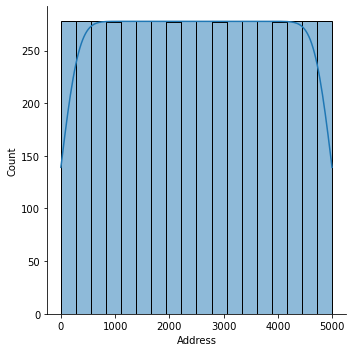

In [42]:
countnious_col = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price','Address']

for i in countnious_col:
    sns.displot(house[i], kde=True)


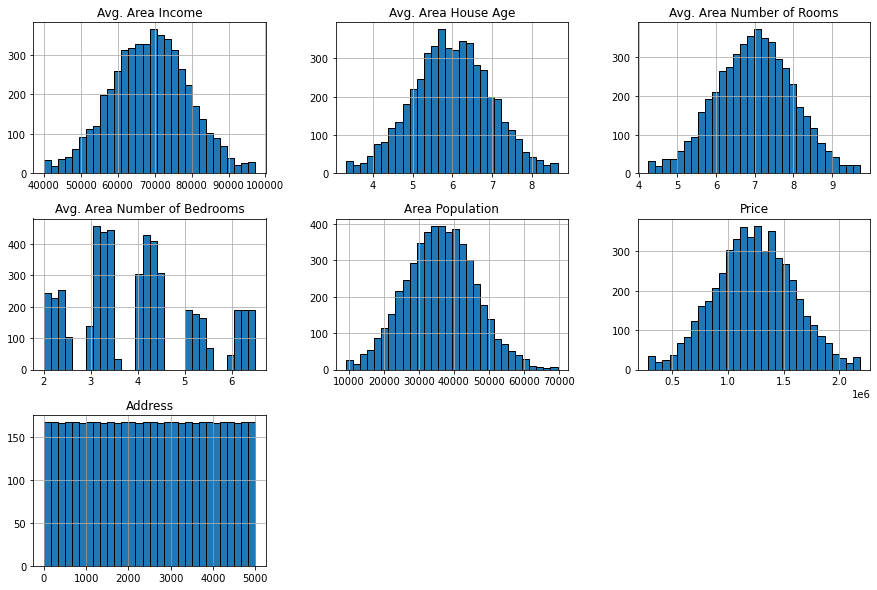

In [43]:
house.hist(figsize=(15,10),bins=30,edgecolor='black')
plt.show()

<AxesSubplot:>

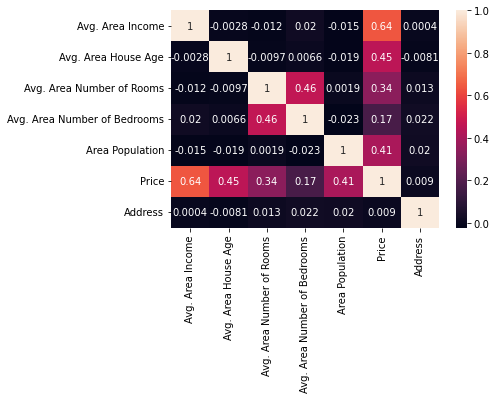

In [44]:
sns.heatmap(house.corr(),annot=True)

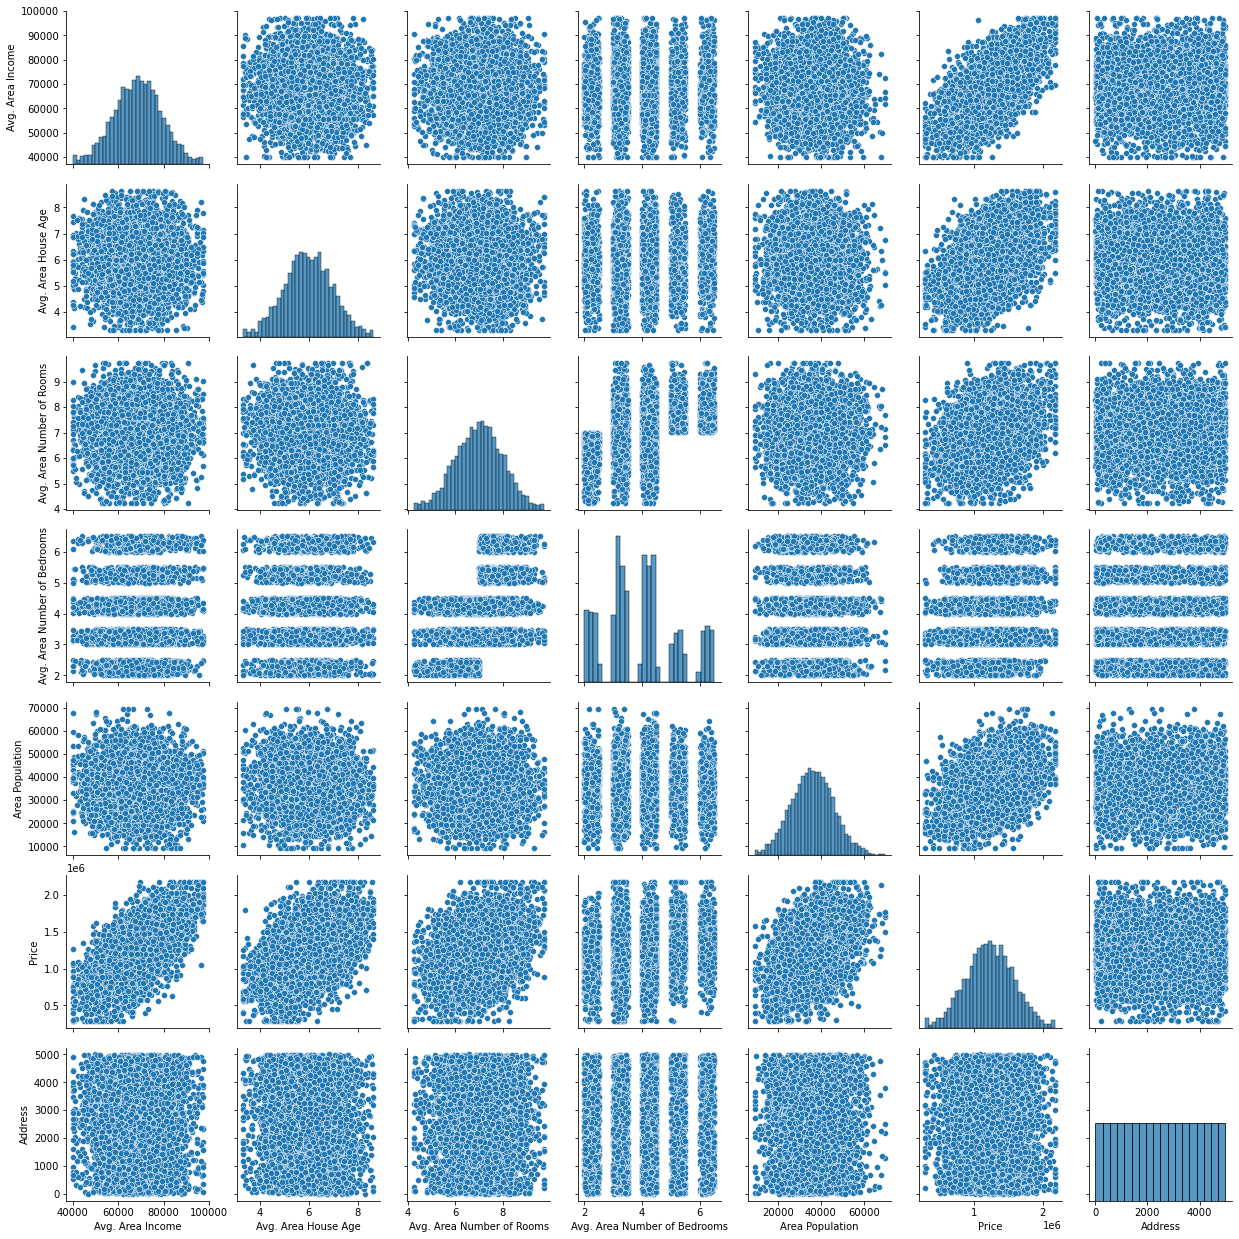

In [46]:
sns.pairplot(house)

C:\Users\neeth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

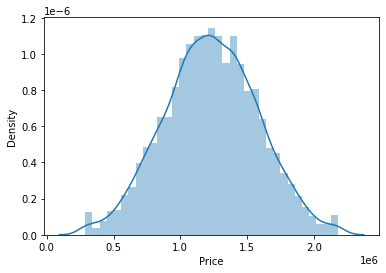

In [47]:
sns.distplot(house['Price'])

# MODEL CREATION

In [48]:
x=house.drop("Price",axis=1)
y=house['Price']

In [49]:
x.shape

(5000, 6)

In [50]:
y.shape

(5000,)

In [51]:
min=MinMaxScaler(feature_range=(0,1))
x=min.fit_transform(x)
x

array([[0.69074209, 0.44285524, 0.50487016, 0.46444444, 0.22968089,
        0.19243849],
       [0.68555446, 0.50307737, 0.45395668, 0.24222222, 0.51251974,
        0.17263453],
       [0.37162896, 0.47729599, 0.77986822, 0.69555556, 0.45804338,
        0.81396279],
       ...,
       [0.40839521, 0.73785725, 0.1017379 , 0.02888889, 0.39818542,
        0.3794759 ],
       [0.48897828, 0.41491686, 0.52699302, 0.76444444, 0.55311818,
        0.96679336],
       [0.44544592, 0.50108379, 0.46520782, 0.46      , 0.61727426,
        0.34066813]])

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Linear Regression

In [53]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [54]:
predict=model.predict(x_test)
predict

array([1553678.69865029, 1582061.35772748,  941852.91732484,
        943404.89976916, 1183640.50148958,  357167.51932293,
       1928452.71914426, 1068739.42537992, 1649132.76359175,
       1071971.51319339,  625904.74841891, 1539134.48742813,
       1630387.85301821, 1055282.83938473,  960891.95100232,
       1235026.20231326, 1427291.49114767,  926306.29125263,
       1128664.19289442, 1157988.70578583, 1297278.36160592,
       1865510.7871195 , 1183416.57657445, 1190785.98834083,
       1556908.78023201, 1862123.27960422,  814754.3744443 ,
       1062662.54439745, 1226133.62536652,  661925.79690105,
        843051.99373921, 1637391.73158645,  666461.30952294,
       1116132.53523255,  801068.83621018, 1303943.09130614,
       1147382.9594819 , 1351827.53421813, 1035074.29658868,
       1162654.01738085, 1412609.4212768 , 1308424.47718919,
       1575562.43119007, 1300319.8876517 ,  850313.65658058,
        924600.97639124, 1228890.54598243, 1161912.05663857,
       1419792.29832254,

In [55]:
accuracy=r2_score(y_test,predict)*100
accuracy

92.03211729145289

In [56]:
predict1=model.predict(x_train)
predict1

array([1315053.87112709, 1798470.47404146,  950495.12987145, ...,
       1351535.32307842, 1233665.64202651,  931599.18375493])

In [57]:
accuracy1=r2_score(y_train,predict1)*100
accuracy1

91.56769606948562

Text(0, 0.5, 'predicted_y')

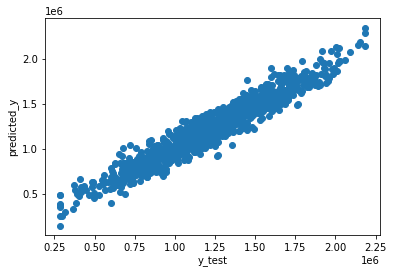

In [58]:
#COMPARE PREDICTED TO ACTUAL VALUES


plt.scatter(y_test,predict)
plt.xlabel('y_test')
plt.ylabel('predicted_y')

# Lasso Regression

In [59]:
modellasso=Lasso(alpha=2.0,fit_intercept=True,normalize=False,precompute=True,copy_X=False)
modellasso.fit(x_train,y_train)

Lasso(alpha=2.0, copy_X=False, precompute=True)

In [60]:
predlasso=modellasso.predict(x_test)
predlasso

array([1553655.38045534, 1582048.01571958,  941858.28857929,
        943423.15101503, 1183651.79659513,  357224.68928146,
       1928408.66272046, 1068754.5364184 , 1649103.77169973,
       1071979.56009502,  625938.27340647, 1539108.43469148,
       1630364.96710554, 1055313.8435656 ,  960916.11954086,
       1235036.85892658, 1427274.67977679,  926325.54491058,
       1128666.2206291 , 1157979.2851537 , 1297274.51741463,
       1865469.66344833, 1183402.97219816, 1190798.14924544,
       1556893.02853195, 1862094.29083839,  814768.86437623,
       1062670.43821376, 1226127.41821111,  661961.59860147,
        843066.52893728, 1637352.56110921,  666499.29696107,
       1116148.22952175,  801103.85074402, 1303932.02103699,
       1147381.81658856, 1351821.0880693 , 1035091.69453743,
       1162669.74596672, 1412595.0826733 , 1308414.14085965,
       1575534.91544946, 1300312.96772172,  850326.26045032,
        924625.89392164, 1228884.98505937, 1161917.99866989,
       1419781.1066145 ,

In [61]:
acc_lasso=r2_score(y_test,predlasso)*100
acc_lasso

92.0321509435149

C:\Users\neeth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

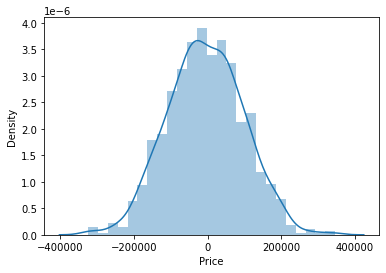

In [62]:
sns.distplot(y_test-predlasso)

In [63]:
predlasso_train=modellasso.predict(x_train)
predlasso_train

array([1315060.2077974 , 1798424.25618496,  950511.9921581 , ...,
       1351539.26683833, 1233675.65050486,  931621.90364076])

In [64]:
acc_lasso_train=r2_score(y_train,predlasso_train)*100
acc_lasso_train

91.56769564459829

# Ridge Regression

In [66]:
model_ridge=Ridge()
model_ridge.fit(x_train,y_train)

Ridge()

In [67]:
pred_ridge=model_ridge.predict(x_test)
pred_ridge

array([1551193.76403706, 1578728.8310785 ,  944751.55626567,
        944897.0404817 , 1184233.36258863,  364744.67324164,
       1923565.14538673, 1070164.06838314, 1645287.85054147,
       1072295.95524426,  631109.92281859, 1537760.72860544,
       1627139.68767568, 1057398.72621125,  964069.89623139,
       1234431.10998703, 1425862.19873766,  928044.68264255,
       1130279.06965214, 1158693.21864917, 1296520.20357291,
       1861477.06176873, 1184403.43359713, 1190856.02336171,
       1554359.77553296, 1856772.12965675,  818944.49995878,
       1063563.00573435, 1225387.88576683,  666999.29279964,
        846691.51636781, 1635668.55195767,  670845.53986008,
       1116258.55360694,  804308.83624762, 1303494.5297303 ,
       1148362.68622296, 1351751.07457693, 1036617.68387455,
       1162852.85827518, 1410487.18299329, 1308707.33976892,
       1572632.86088061, 1299983.31764765,  854248.01328666,
        926845.52118593, 1227878.82371346, 1162109.25172125,
       1417897.75009074,

In [68]:
r2_score(y_test,pred_ridge)*100

92.03206235530178

C:\Users\neeth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

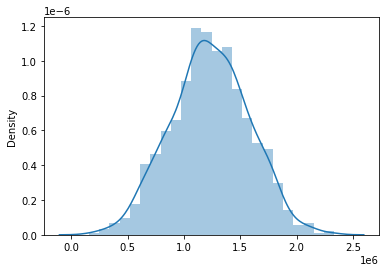

In [69]:
sns.distplot(pred_ridge)

In [70]:
pred_ridge_train=model_ridge.predict(x_train)
pred_ridge_train

array([1313967.78967563, 1794556.53709969,  952385.82963812, ...,
       1350359.72760075, 1233619.71851791,  934726.78404537])

In [71]:
r2_score(y_train,pred_ridge_train)*100


91.56156366937319

# Decision Tree

In [72]:
model_dec=DecisionTreeRegressor()
model_dec.fit(x_train,y_train)

DecisionTreeRegressor()

In [73]:
pred_dec=model_dec.predict(x_test)
pred_dec

array([1507035.874   , 1602903.281   ,  905045.2177  , 1240319.692   ,
       1286974.697   ,  619087.6936  , 1546408.558   , 1124800.012   ,
       1621742.748   , 1202227.957   ,  652991.1054  , 1316129.309   ,
       1509422.58    ,  816772.3751  , 1039107.326   , 1364029.168   ,
       1520234.229   ,  994897.1126  , 1308773.078   , 1151189.642   ,
       1324022.025   , 1731437.416   , 1311473.323   ,  952912.2012  ,
       1509422.58    , 1850525.573   ,  743212.4195  , 1046347.121   ,
        899466.5749  ,  518831.4706  ,  722115.1243  , 1447353.264   ,
        592512.4283  , 1049798.785   ,  905328.7691  , 1356146.261   ,
       1147313.02    , 1418310.085   ,  952533.5782  , 1034779.19    ,
       1185734.958   , 1280276.424   , 1434323.825   , 1306207.111   ,
       1002023.358   , 1076438.975   , 1124125.921   , 1383938.367   ,
       1451930.631   , 1302347.574   , 1485145.661   ,  720059.8348  ,
        685775.598   , 1202844.374   , 1509929.832   , 1361521.983   ,
      

In [74]:
r2_score(y_test,pred_dec)*100

77.99638926814035

In [75]:
pred_dec_train=model_dec.predict(x_train)
pred_dec_train

array([1336377.825 , 1747911.496 ,  886815.9436, ..., 1345962.955 ,
       1270928.034 , 1039107.326 ])

In [76]:
r2_score(y_train,pred_dec_train)*100

100.0

# Random Forest

In [77]:
random_regressor=RandomForestRegressor()
random_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
pred_rf=random_regressor.predict(x_test)

In [79]:
accu_ran=r2_score(y_test,pred_rf)*100
accu_ran

89.19323996748084

In [80]:
pred_rf_train=random_regressor.predict(x_train)

In [81]:
accu_ran=r2_score(y_train,pred_rf_train)*100
accu_ran

98.34473273493128

# AdaBoost Algorithm

In [82]:
model_ada=AdaBoostRegressor()
model_ada.fit(x_train,y_train)

AdaBoostRegressor()

In [83]:
pred_ada=model_ada.predict(x_test)
pred_ada

array([1676623.79378143, 1691546.97953445, 1085143.52738466,
       1037959.25521331, 1105937.02949138,  816981.14977195,
       1698086.35145084, 1063986.86111211, 1453336.03790294,
       1117719.96532366,  638982.58872621, 1453336.03790294,
       1705995.82613301, 1235166.42990051,  940381.03030985,
       1158044.58496952, 1464540.80512722, 1037959.25521331,
       1158044.58496952, 1124081.87674898, 1235166.42990051,
       1726800.50175504, 1150015.07225929, 1263112.60623241,
       1698086.35145084, 1698945.63898918, 1065997.28623663,
       1063986.86111211, 1124081.87674898,  843052.45318224,
        843052.45318224, 1448563.43243813,  665719.93201618,
       1100050.51575561, 1014494.28148857, 1150015.07225929,
       1158044.58496952, 1424499.71101207, 1070424.20307199,
       1102533.25159651, 1373457.00402449, 1232301.26710765,
       1340739.90399886, 1452472.81469261, 1047059.01928717,
        927214.64633565, 1222956.58628761, 1102533.25159651,
       1333122.3088075 ,

In [84]:
r2_score(y_test,pred_ada)*100

83.49666949579634

In [85]:
pred_ada_train=model_ada.predict(x_train)
pred_ada_train

array([1317306.55788492, 1698656.23201817,  830005.83415904, ...,
       1317306.55788492, 1171096.53280089,  987931.20642237])

In [86]:
r2_score(y_train,pred_ada_train)*100

84.07522307660433

In [87]:
Accuracy=pd.DataFrame(
{
    "models":['Linear regression','Lasso regression','Ridge regression','Decission tree','Random forest','Ada boosting'],
    'Test_Accuracy':[92.0321,92.0321,92.032,77.99,89.193,83.4966],
    'Train_Accuracy':[91.567,91.567,91.561,100,98.344,84.075]
})
Accuracy

,models,Test_Accuracy,Train_Accuracy
0,Linear regression,92.0321,91.567
1,Lasso regression,92.0321,91.567
2,Ridge regression,92.0320,91.561
3,Decission tree,77.9900,100.000
4,Random forest,89.1930,98.344
5,Ada boosting,83.4966,84.075


<AxesSubplot:>

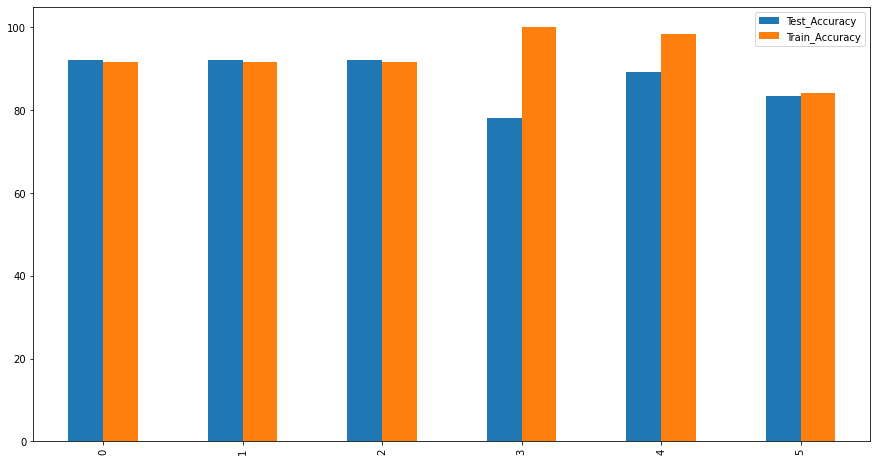

In [88]:
Accuracy.plot(kind='bar',figsize=(15,8))